<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Spam_message_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [4]:
df = pd.read_csv('/content/Spam-Classification.csv')

In [5]:
df

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...
...,...,...
1495,ham,"Yup, no need. I'll jus wait 4 e rain 2 stop."
1496,ham,Yup... From what i remb... I think should be c...
1497,ham,Yup... How Ã¼ noe leh...
1498,ham,Yup... Ok i go home look at the timings then i...


In [7]:
spam_class_raw = df['CLASS']
spam_message = df['SMS']

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
def tokenizer(str):
    tokens = nltk.word_tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'),tokens))
    lemmatizer = WordNetLemmatizer()
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokenizer)
tfidf=vectorizer.fit_transform(spam_message)

tfidf_array = tfidf.toarray()

In [32]:
tfidf_array.shape

(1500, 4566)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
spam_class = le.fit_transform(spam_class_raw)

In [34]:
spam_class

array([0, 0, 1, ..., 0, 0, 1])

In [35]:
spam_class.shape

(1500,)

In [37]:
spam_class = tf.keras.utils.to_categorical(spam_class,2)
spam_class

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(tfidf_array,spam_class,test_size=.1)

In [47]:
x_train.shape[1],x_train.shape[0]

(4566, 1350)

In [48]:
input = tf.keras.Input(shape=x_train.shape[1])

dense = tf.keras.layers.Dense(30,activation='relu')

x = dense(input)

x = tf.keras.layers.Dense(30,activation='relu')(x)

output = tf.keras.layers.Dense(2,activation="softmax")(x)

model = tf.keras.Model(inputs=input,outputs=output)

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4566)]            0         
                                                                 
 dense_6 (Dense)             (None, 30)                137010    
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 2)                 62        
                                                                 
Total params: 138,002
Trainable params: 138,002
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [53]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    validation_split=.1
)

Epoch 1/10
10/10 [==============================] - 3s 74ms/step - loss: 0.6885 - accuracy: 0.6675 - val_loss: 0.6786 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 0s 22ms/step - loss: 0.6601 - accuracy: 0.8897 - val_loss: 0.6431 - val_accuracy: 0.8815
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 0.6020 - accuracy: 0.9580 - val_loss: 0.5765 - val_accuracy: 0.9333
Epoch 4/10
10/10 [==============================] - 0s 21ms/step - loss: 0.5096 - accuracy: 0.9827 - val_loss: 0.4844 - val_accuracy: 0.9481
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.3943 - accuracy: 0.9885 - val_loss: 0.3802 - val_accuracy: 0.9704
Epoch 6/10
10/10 [==============================] - 0s 14ms/step - loss: 0.2770 - accuracy: 0.9918 - val_loss: 0.2819 - val_accuracy: 0.9852
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.1791 - accuracy: 0.9942 - val_loss: 0.2061 - val_accuracy: 0.9852
Epoch 8/10
10

<Axes: >

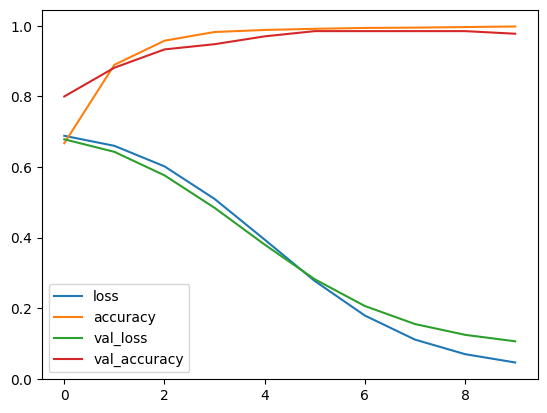

In [54]:
pd.DataFrame(history.history).plot()

In [55]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.1737 - accuracy: 0.9467


[0.173735111951828, 0.9466666579246521]

#. Predict

In [78]:
input = vectorizer.transform(["Yor bank is 100 meter away",
                              "I am in collage"]).toarray()


In [79]:
input

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
pred = model.predict(input)

1/1 [==============================] - 0s 37ms/step


In [81]:
le.inverse_transform(np.argmax(pred,axis=1))

array(['spam', 'ham'], dtype=object)